**Table of contents**<a id='toc0_'></a>

- [Import Libraries](#toc1_1_)
  - [Get Data](#toc1_2_)

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->


## <a id='toc1_1_'></a>[Import Libraries](#toc0_)


In [1]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt

# get data from TradingView
from tvDatafeed import TvDatafeed, Interval
from enum import Enum

tv = TvDatafeed()

you are using nologin method, data you access may be limited


In [2]:
class TimeFrame(Enum):
    DAILY = "daily"
    YEARLY = "yearly"


class Method(Enum):
    PERCENTAGE = "pct"
    HLO = "hlo"  # (high - low) / close

## <a id='toc1_2_'></a>[Get Data](#toc0_)


In [3]:
interval = Interval.in_daily

data = tv.get_hist(symbol="BTCUSDT", exchange="OKX", interval=interval, n_bars=10_000)
data

,symbol,open,high,low,close,volume
datetime,,,,,,
2018-08-07 07:00:00,OKX:BTCUSDT,6972.9627,7147.2699,6845.0464,7113.6763,24039.496859
2018-08-08 07:00:00,OKX:BTCUSDT,7113.6763,7136.8967,6393.5254,6472.3698,71008.709482
2018-08-09 07:00:00,OKX:BTCUSDT,6476.2092,6540.2446,6120.0427,6444.0000,77974.271200
2018-08-10 07:00:00,OKX:BTCUSDT,6448.1904,6623.0000,6301.0000,6451.9998,122977.797222
2018-08-11 07:00:00,OKX:BTCUSDT,6451.9998,6458.4283,5988.4683,6110.8639,111697.440791
...,...,...,...,...,...,...
2024-04-23 07:00:00,OKX:BTCUSDT,66813.0000,67183.0000,65808.5000,66413.9000,6656.026198
2024-04-24 07:00:00,OKX:BTCUSDT,66413.9000,67078.2000,63602.8000,64282.6000,9808.730784
2024-04-25 07:00:00,OKX:BTCUSDT,64278.6000,65289.8000,62747.4000,64505.7000,16222.822963


In [27]:
START_YEAR = 2020
END_YEAR = 2024

# filtered year
filtered_data = data[(data.index.year >= START_YEAR) & (data.index.year <= END_YEAR)]
filtered_data

,symbol,open,high,low,close,volume
datetime,,,,,,
2020-01-01 07:00:00,OKX:BTCUSDT,7195.1,7255.9,7146.6,7231.9,6790.039214
2020-01-02 07:00:00,OKX:BTCUSDT,7231.8,7248.7,7106.1,7131.9,9662.516939
2020-01-03 07:00:00,OKX:BTCUSDT,7131.9,7376.3,6870.7,7319.5,35308.207660
2020-01-04 07:00:00,OKX:BTCUSDT,7320.3,7404.8,7260.0,7318.8,15952.287979
2020-01-05 07:00:00,OKX:BTCUSDT,7318.9,7494.7,7272.5,7467.3,17497.527117
...,...,...,...,...,...,...
2024-04-23 07:00:00,OKX:BTCUSDT,66813.0,67183.0,65808.5,66413.9,6656.026198
2024-04-24 07:00:00,OKX:BTCUSDT,66413.9,67078.2,63602.8,64282.6,9808.730784
2024-04-25 07:00:00,OKX:BTCUSDT,64278.6,65289.8,62747.4,64505.7,16222.822963


## Close Price Distribution

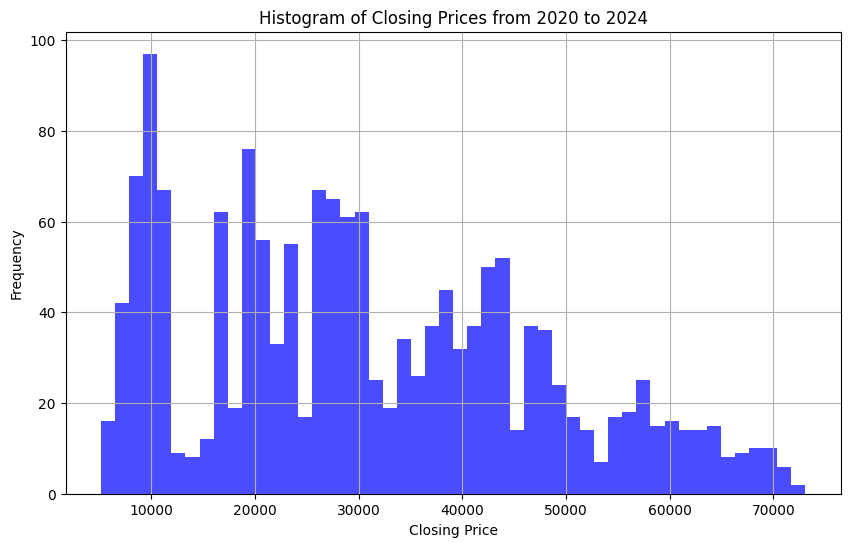

In [29]:
def plot_close_prices_histogram(
    data: pd.DataFrame,
    title=None,
    x_label="Closing Price",
    y_label="Frequency",
    grid=True,
):
    """Plot the close price histogram"""
    # Check if DataFrame index is of datetime type
    if not isinstance(data.index, pd.DatetimeIndex):
        raise ValueError("DataFrame index must be of datetime type")

    plt.figure(figsize=(10, 6))
    plt.hist(data["close"], bins=50, color="blue", alpha=0.7)

    # customization
    if title:
        plt.title(title)
    else:
        plt.title(
            f"Histogram of Closing Prices from {data.index.year[0]} to {data.index.year[-1]}"
        )

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    if grid:
        plt.grid(True)


plot_close_prices_histogram(data=filtered_data)

### Stdev

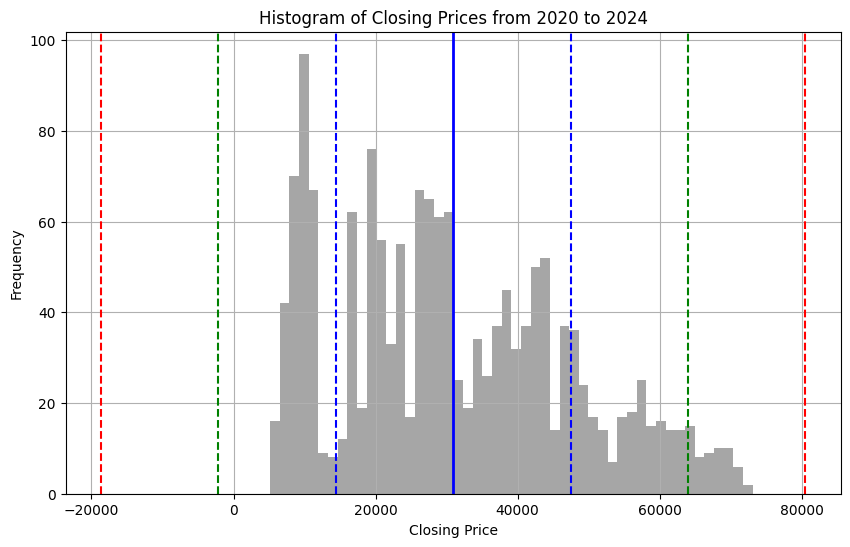

In [30]:
def plot_close_prices_histogram_with_stdev(
    data: pd.DataFrame,
    title=None,
    x_label="Closing Price",
    y_label="Frequency",
    grid=True,
):
    """Plot the close price histogram"""
    # Check if DataFrame index is of datetime type
    if not isinstance(data.index, pd.DatetimeIndex):
        raise ValueError("DataFrame index must be of datetime type")

    mean = data["close"].mean()
    std = data["close"].std()
    stdev_pos_1, stdev_neg_1, stdev_pos_2, stdev_neg_2, stdev_pos_3, stdev_neg_3 = (
        _cal_stdev(mean=mean, std=std)
    )

    plt.figure(figsize=(10, 6))
    plt.hist(data["close"], bins=50, color="grey", alpha=0.7)

    # Add vertical lines for mean and SD ranges
    plt.axvline(mean, color="blue", linestyle="-", linewidth=2, label="Mean")
    plt.axvline(stdev_pos_1, color="blue", linestyle="--", label="Mean + 1SD")
    plt.axvline(stdev_neg_1, color="blue", linestyle="--", label="Mean - 1SD")
    plt.axvline(stdev_pos_2, color="green", linestyle="--", label="Mean + 2SD")
    plt.axvline(stdev_neg_2, color="green", linestyle="--", label="Mean - 2SD")
    plt.axvline(stdev_pos_3, color="red", linestyle="--", label="Mean + 3SD")
    plt.axvline(stdev_neg_3, color="red", linestyle="--", label="Mean - 3SD")

    # customization
    if title:
        plt.title(title)
    else:
        plt.title(
            f"Histogram of Closing Prices from {data.index.year[0]} to {data.index.year[-1]}"
        )

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    if grid:
        plt.grid(True)


def _cal_stdev(
    mean: float, std: float
) -> tuple[float, float, float, float, float, float]:
    stdev_pos_1 = mean + std
    stdev_neg_1 = mean - std
    stdev_pos_2 = mean + 2 * std
    stdev_neg_2 = mean - 2 * std
    stdev_pos_3 = mean + 3 * std
    stdev_neg_3 = mean - 3 * std

    return stdev_pos_1, stdev_neg_1, stdev_pos_2, stdev_neg_2, stdev_pos_3, stdev_neg_3


plot_close_prices_histogram_with_stdev(data=filtered_data[filtered_data["close"] > 0])

### Peak Density

In [31]:
# หาจุด peak dist tri
# หาระยะ

## Stats Volatility


In [32]:
def cal_voltility(data: pd.DataFrame, timeframe=TimeFrame, method=Method) -> pd.Series:
    """
    Calculate the volatility of financial data.

    Parameters
    ----------
    data : pd.DataFrame
        A DataFrame containing financial data, including columns for 'open', 'high', 'low', and 'close'.
    timeframe : TimeFrame, optional
        The timeframe over which to calculate volatility, either TimeFrame.DAILY or TimeFrame.YEARLY.
        Defaults to TimeFrame.DAILY.
    method : Method, optional
        The method to use for calculating volatility, either Method.PERCENTAGE or Method.HLO.
        Defaults to Method.PERCENTAGE.

    Returns
    -------
    pd.Series
        A pandas Series containing the calculated volatility.

    Raises
    ------
    ValueError
        If an invalid method is provided.
    """
    def _cal_method(data: pd.Series):
        return (data.groupby(data.index.year).std()
            if timeframe == TimeFrame.DAILY
            else  data.groupby(data.index.year).std() * np.sqrt(252)
        )
        
    if method == Method.PERCENTAGE:
        volatility = data["close"].pct_change()
        return _cal_method(data=volatility)
    elif method == method.HLO:
        volatility = (data["high"] - data["low"]) / data["open"]
        return _cal_method(data=volatility)
    else:
        raise ValueError("Not found method!")


def cal_stats(data: pd.Series):
    """Calculate the min max and mean from the series data which normalized as percentage"""
    data_min = round(data.min(), 2)
    data_max = round(data.max(), 2)
    data_mean = round(data.mean(), 2)

    # Output
    print(f"min: {data_min}%\nmax: {data_max}%\nmean: {data_mean}%")

    return data_min, data_max, data_max

### Percentage Change


The standard deviation of daily returns for each year.


In [34]:
daily_volatility = (
    cal_voltility(filtered_data, timeframe=TimeFrame.DAILY, method=Method.PERCENTAGE)
    * 100
)

# filter blackswan
filtered_daily_volatility = daily_volatility[daily_volatility < daily_volatility.quantile(0.99)]

# output
cal_stats(data=filtered_daily_volatility)
print(filtered_daily_volatility)

# show remove outlier
remove_indices = daily_volatility.index.difference(filtered_daily_volatility.index)
print(f"\nRemove out of quantile 99%: \n{daily_volatility[remove_indices]}")

min: 2.31%
max: 3.33%
mean: 3.0%
datetime
2020    3.260430
2022    3.333632
2023    2.308417
2024    3.093784
Name: close, dtype: float64

Remove out of quantile 99%: 
datetime
2021    4.702465
Name: close, dtype: float64


The annualized standard deviation of returns for each year


In [35]:
annualized_volatility = (
    cal_voltility(filtered_data, timeframe=TimeFrame.YEARLY, method=Method.PERCENTAGE) * 100
)

# filter blackswan
filtered_annualized_volatility = annualized_volatility[annualized_volatility < annualized_volatility.quantile(0.99)]
# output
cal_stats(data=filtered_annualized_volatility)
print(filtered_annualized_volatility)

# show remove outlier
remove_indices = annualized_volatility.index.difference(filtered_annualized_volatility.index)
print(f"\nRemove out of quantile 99%: \n{annualized_volatility[remove_indices]}")

min: 36.64%
max: 52.92%
mean: 47.61%
datetime
2020    51.757729
2022    52.919767
2023    36.644990
2024    49.112302
Name: close, dtype: float64

Remove out of quantile 99%: 
datetime
2021    74.649318
Name: close, dtype: float64


### (High - Low) / Open


The standard deviation of daily returns for each year.


In [36]:
daily_volatility = (
    cal_voltility(filtered_data, timeframe=TimeFrame.DAILY, method=Method.HLO)
    * 100
)

# filter blackswan
filtered_daily_volatility = daily_volatility[daily_volatility < daily_volatility.quantile(0.99)]

# output
cal_stats(data=filtered_daily_volatility)
print(filtered_daily_volatility)

# show remove outlier
remove_indices = daily_volatility.index.difference(filtered_daily_volatility.index)
print(f"\nRemove out of quantile 99%: \n{annualized_volatility[remove_indices]}")

min: 2.33%
max: 3.94%
mean: 3.01%
datetime
2020    3.940786
2022    2.971013
2023    2.328513
2024    2.819140
dtype: float64

Remove out of quantile 99%: 
datetime
2021    74.649318
Name: close, dtype: float64


The annualized standard deviation of returns for each year


In [37]:
annualized_volatility = (
    cal_voltility(filtered_data, timeframe=TimeFrame.YEARLY, method=Method.HLO) * 100
)

# filter blackswan
filtered_annualized_volatility = annualized_volatility[annualized_volatility < annualized_volatility.quantile(0.99)]

# output
cal_stats(data=filtered_annualized_volatility)
print(filtered_annualized_volatility)

# show remove outlier
remove_indices = annualized_volatility.index.difference(filtered_annualized_volatility.index)
print(f"\nRemove out of quantile 99%: {annualized_volatility[remove_indices]}")

min: 36.96%
max: 62.56%
mean: 47.86%
datetime
2020    62.558039
2022    47.163374
2023    36.963995
2024    44.752459
dtype: float64

Remove out of quantile 99%: datetime
2021    66.845158
dtype: float64


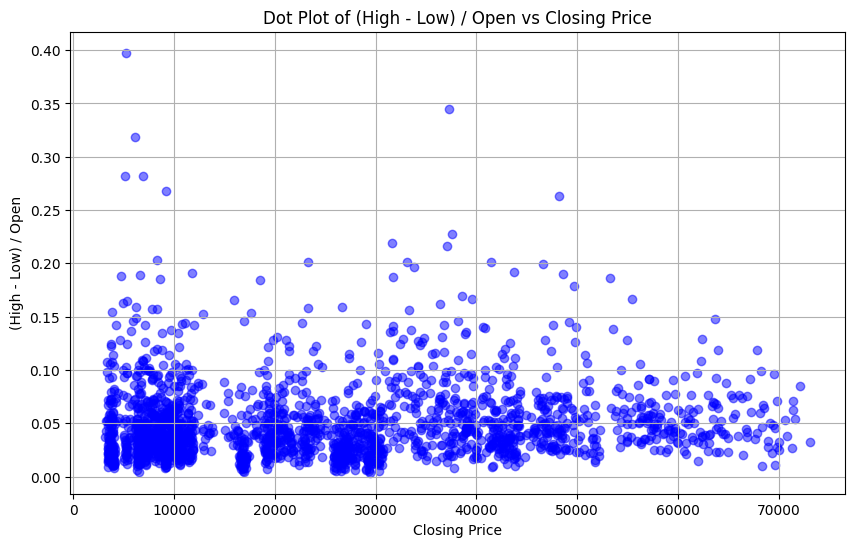

In [13]:
filtered_data.loc[:, "y_values"] = (
    filtered_data["high"] - filtered_data["low"]
) / filtered_data["open"]
# Create the dot plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data["close"], filtered_data["y_values"], alpha=0.5, color="blue")
plt.title("Dot Plot of (High - Low) / Open vs Closing Price")
plt.xlabel("Closing Price")
plt.ylabel("(High - Low) / Open")
plt.grid(True)
plt.show()

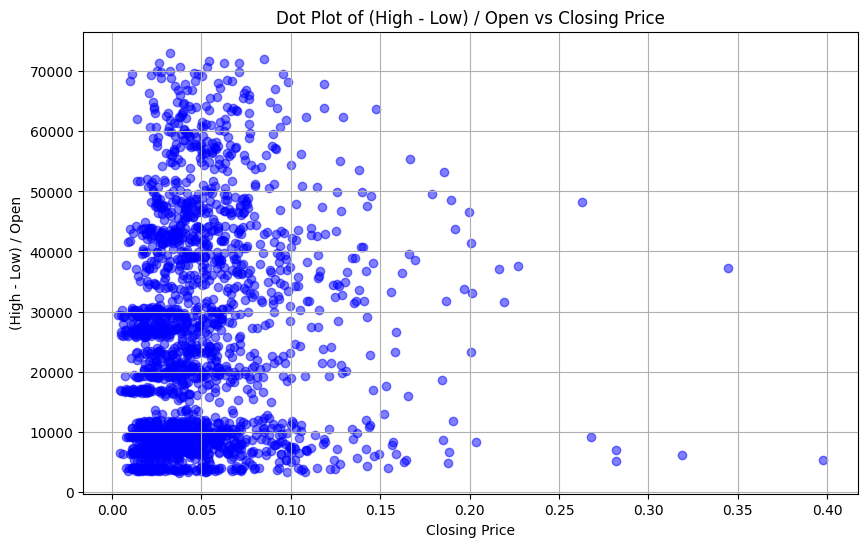

In [14]:
filtered_data.loc[:, "y_values"] = (
    filtered_data["high"] - filtered_data["low"]
) / filtered_data["open"]
# Create the dot plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data["y_values"], filtered_data["close"], alpha=0.5, color="blue")
plt.title("Dot Plot of (High - Low) / Open vs Closing Price")
plt.xlabel("Closing Price")
plt.ylabel("(High - Low) / Open")
plt.grid(True)
plt.show()